In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### This section performs initial exploration and cleaning of both transaction and customer datasets. ###
# Load datasets
transaction_df = pd.read_excel('QVI_transaction_data.xlsx', sheet_name = 'in')
customer_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
# Check Transaction's data structure
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
transaction_df.shape

(264836, 8)

In [6]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [7]:
# Clean format in text columns
transaction_df['PROD_NAME'] = (
    transaction_df['PROD_NAME']
    .str.lower()
    .str.strip()
    .replace(r'\s+', ' ', regex = True)
)

In [8]:
# Convert 'Date' data type and check

transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], origin = '1899-12-30', unit = 'D')
transaction_df['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [9]:
# Check missing values
transaction_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
# Check duplicates
transaction_df.duplicated().sum()

1

In [11]:
# Drop duplicate
transaction_df = transaction_df.drop_duplicates()
transaction_df.duplicated().sum()

0

<AxesSubplot:xlabel='TOT_SALES'>

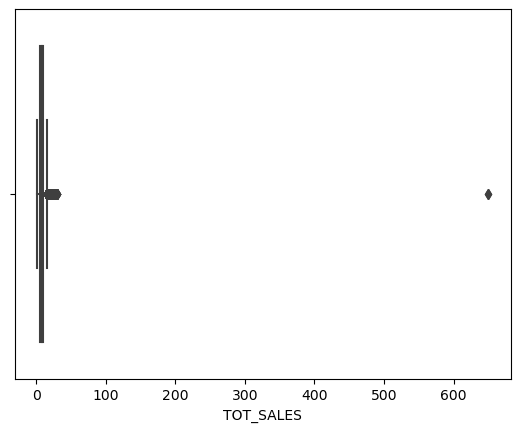

In [12]:
# Plot boxplot to visually inspect outliers in TOT_SALES
sns.boxplot(x=transaction_df['TOT_SALES'])

<AxesSubplot:xlabel='PROD_QTY'>

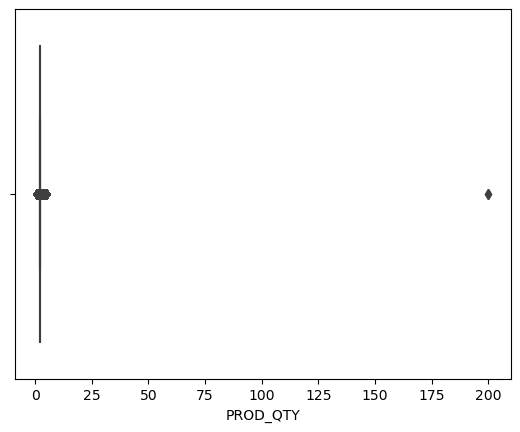

In [13]:
# Plot boxplot to visually inspect outliers in PROD_QTY
sns.boxplot(x=transaction_df['PROD_QTY'])

In [14]:
# Remove outliers from TOT_SALES using the IQR method
Q1 = transaction_df['TOT_SALES'].quantile(0.25)  # 25th percentile
Q3 = transaction_df['TOT_SALES'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
lower = Q1 - 1.5 * IQR  # Lower bound
upper = Q3 + 1.5 * IQR  # Upper bound

# Keep only rows within the acceptable range
transaction_df = transaction_df[(transaction_df['TOT_SALES'] >= lower) & (transaction_df['TOT_SALES'] <= upper)]

In [15]:
# Remove outliers from TOT_SALES using the IQR method
Q1 = transaction_df['TOT_SALES'].quantile(0.25)
Q3 = transaction_df['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers in TOT_SALES
transaction_df = transaction_df[(transaction_df['TOT_SALES'] >= lower) & (transaction_df['TOT_SALES'] <= upper)]

In [16]:
# Remove outliers from PROD_QTY using the IQE method
Q1 = transaction_df['PROD_QTY'].quantile(0.25)
Q3 = transaction_df['PROD_QTY'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove Outliers in PROD_QTY
transaction_df = transaction_df[(transaction_df['PROD_QTY'] >= lower) & (transaction_df['PROD_QTY'] <= upper)]

In [17]:
# Re-check outliers
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,236038.000000,2.360380e+05,2.360380e+05,236038.000000,236038.0,236038.000000
mean,135.217016,1.356217e+05,1.353047e+05,56.553462,2.0,7.675752
std,76.239827,7.923851e+04,7.763409e+04,32.821592,0.0,2.215836
min,1.000000,1.000000e+03,1.000000e+00,1.000000,2.0,2.700000
25%,70.000000,7.009200e+04,6.801925e+04,28.000000,2.0,6.000000
50%,130.000000,1.301860e+05,1.344140e+05,56.000000,2.0,7.600000
75%,203.000000,2.031780e+05,2.030148e+05,85.000000,2.0,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,2.0,13.000000


In [18]:
# Check Customer's data structure
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [19]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
customer_df.shape

(72637, 3)

In [21]:
# Standardise text in LIFESTAGE and PREMIUM_CUSTOMER columns
customer_df['LIFESTAGE'] = (
    customer_df['LIFESTAGE']
    .str.lower()
    .str.strip()
    .replace(r'\s+', ' ', regex = True)
)

customer_df['PREMIUM_CUSTOMER'] = (
    customer_df['PREMIUM_CUSTOMER']
    .str.lower()
    .str.strip()
    .replace(r'\s+', ' ', regex = True)
)

In [22]:
# Check distribution of customer segments from LIFESTAGE AND PREMIUM_CUSTOMER columns
customer_df['LIFESTAGE'].value_counts()

retirees                  14805
older singles/couples     14609
young singles/couples     14441
older families             9780
young families             9178
midage singles/couples     7275
new families               2549
Name: LIFESTAGE, dtype: int64

In [23]:
customer_df['PREMIUM_CUSTOMER'].value_counts()

mainstream    29245
budget        24470
premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [24]:
# Check missing values
customer_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [25]:
# Chek duplicates
customer_df.duplicated().sum()

0

In [26]:
# Merge Transaction and Customer datasets
chip_df = transaction_df.merge(customer_df, on = 'LYLTY_CARD_NBR', how = 'left')

In [27]:
# Check data structure
chip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236038 entries, 0 to 236037
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              236038 non-null  datetime64[ns]
 1   STORE_NBR         236038 non-null  int64         
 2   LYLTY_CARD_NBR    236038 non-null  int64         
 3   TXN_ID            236038 non-null  int64         
 4   PROD_NBR          236038 non-null  int64         
 5   PROD_NAME         236038 non-null  object        
 6   PROD_QTY          236038 non-null  int64         
 7   TOT_SALES         236038 non-null  float64       
 8   LIFESTAGE         236038 non-null  object        
 9   PREMIUM_CUSTOMER  236038 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 19.8+ MB


In [28]:
# Extract SIZE from PROD_NAME
chip_df['SIZE'] = chip_df['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [29]:
# Extract BRAND from PROD_NAME
# Check brands
chip_df['PROD_NAME'].unique()

array(['natural chip compny seasalt175g',
       'smiths crinkle cut chips chicken 170g',
       'grain waves sour cream&chives 210g', 'twisties cheese 270g',
       'kettle tortilla chpshny&jlpno chili 150g',
       'smiths chip thinly cut original 175g',
       'red rock deli sr salsa & mzzrlla 150g',
       'thins chips light& tangy 175g',
       'smiths crinkle cut salt & vinegar 170g',
       'doritos corn chip mexican jalapeno 150g',
       'pringles sthrn friedchicken 134g',
       'infuzions thai sweetchili potatomix 110g',
       'kettle 135g swt pot sea salt', 'pringles sourcream onion 134g',
       'dorito corn chp supreme 380g', 'twisties chicken270g',
       'cobs popd sea salt chips 110g', 'ww original corn chips 200g',
       'ww crinkle cut chicken 175g',
       'smiths crnkle chip orgnl big bag 380g',
       'old el paso salsa dip tomato med 300g',
       'ww original stacked chips 160g',
       'doritos corn chip southern chicken 150g', 'cheezels cheese 330g',
       

In [30]:
# Drop salsa products and check result
chip_df = chip_df[~chip_df['PROD_NAME'].str.contains('salsa', case = False)]
chip_df['PROD_NAME'].unique()

array(['natural chip compny seasalt175g',
       'smiths crinkle cut chips chicken 170g',
       'grain waves sour cream&chives 210g', 'twisties cheese 270g',
       'kettle tortilla chpshny&jlpno chili 150g',
       'smiths chip thinly cut original 175g',
       'thins chips light& tangy 175g',
       'smiths crinkle cut salt & vinegar 170g',
       'doritos corn chip mexican jalapeno 150g',
       'pringles sthrn friedchicken 134g',
       'infuzions thai sweetchili potatomix 110g',
       'kettle 135g swt pot sea salt', 'pringles sourcream onion 134g',
       'dorito corn chp supreme 380g', 'twisties chicken270g',
       'cobs popd sea salt chips 110g', 'ww original corn chips 200g',
       'ww crinkle cut chicken 175g',
       'smiths crnkle chip orgnl big bag 380g',
       'ww original stacked chips 160g',
       'doritos corn chip southern chicken 150g', 'cheezels cheese 330g',
       'kettle sensations siracha lime 150g', 'cheetos puffs 165g',
       'kettle chilli 175g', 'smith

In [31]:
# Create brand_list
brand_list = {
    'natural Chip Company': ['natural chip', 'ncc'],
    'smiths': ['smiths', 'smith', 'smith'],
    'grain waves': ['grain waves', 'grnwves'],
    'kettle': ['kettle'],
    'red rock deli': ['red rock deli', 'rrd'],
    'twisties': ['twisties'],
    'thins' : ['thins'],
    'doritos': ['doritos', 'dorito'],
    'pringles': ['pringles'],
    'infuzions': ['infuzions', 'infzns'],
    'cobs': ['cobs'],
    'woolworths': ['woolworths', 'ww'],
    'old el paso': ['old el paso'],
    'tyrrells': ['tyrrells'],
    'tostitos': ['tostitos'],
    'sunbites': ['sunbites', 'snbts'],
    'cheezels': ['cheezels'],
    'french fries': ['french fries'],
    'ccs': ['ccs'],
    'cheetos': ['cheetos'],
    'burger rings': ['burger rings'],
}

In [32]:
# Define a function to extract brand names

def extract_brand(name):
    for brand, variants in brand_list.items():
        for variant in variants:
            if name.startswith(variant):
                return brand
    return 'unknown' 

# Apply function to extract name
chip_df['BRAND'] = chip_df['PROD_NAME'].apply(extract_brand)

In [33]:
# Check all unique values
chip_df['BRAND'].unique()

array(['natural Chip Company', 'smiths', 'grain waves', 'twisties',
       'kettle', 'thins', 'doritos', 'pringles', 'infuzions', 'cobs',
       'woolworths', 'cheezels', 'cheetos', 'burger rings', 'tyrrells',
       'tostitos', 'ccs', 'red rock deli', 'sunbites', 'french fries'],
      dtype=object)

In [34]:
# Check unknown to update brand_list
chip_df[chip_df['BRAND'] == 'unknown']['PROD_NAME'].unique()

array([], dtype=object)

In [35]:
# Calculate unit price
chip_df['UNIT_PRICE'] = chip_df['TOT_SALES']/chip_df['PROD_QTY']

In [36]:
### This section focuses on analysing customer segments and purchasing behaviour. ###
# Preview the first few rows of the cleaned and merged dataset
chip_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,BRAND,UNIT_PRICE
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,young singles/couples,premium,175.0,natural Chip Company,3.00
1,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,170.0,smiths,1.45
2,2018-08-18,7,7150,6900,52,grain waves sour cream&chives 210g,2,7.2,midage singles/couples,budget,210.0,grain waves,3.60
3,2019-05-18,9,9208,8634,15,twisties cheese 270g,2,9.2,midage singles/couples,budget,270.0,twisties,4.60
4,2018-08-15,38,38142,34181,108,kettle tortilla chpshny&jlpno chili 150g,2,9.2,midage singles/couples,budget,150.0,kettle,4.60


In [37]:
# Group by both LIFESTAGE and PREMIUM_CUSTOMER to calculate total chip sales per segment
sales_per_segment = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'] \
                           .sum() \
                           .sort_values(ascending = False) \
                           .reset_index()
sales_per_segment

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,older families,budget,150009.9
1,retirees,mainstream,135028.2
2,young singles/couples,mainstream,134727.4
3,young families,budget,123723.0
4,older singles/couples,budget,120494.4
5,older singles/couples,mainstream,117243.2
6,older singles/couples,premium,116243.8
7,retirees,budget,98685.1
8,older families,mainstream,92179.3
9,retirees,premium,85324.0


In [38]:
# Count number of transactions for each LIFESTAGE and PREMIUM_CUSTOMER segment
transactions = chip_df[['LIFESTAGE', 'PREMIUM_CUSTOMER']].value_counts() \
                                          .reset_index(name = 'COUNT') \
                                          .sort_values('COUNT', ascending = False)
transactions

,LIFESTAGE,PREMIUM_CUSTOMER,COUNT
0,older families,budget,19997
1,retirees,mainstream,17460
2,young singles/couples,mainstream,16493
3,young families,budget,16425
4,older singles/couples,budget,15487
5,older singles/couples,mainstream,15308
6,older singles/couples,premium,14888
7,retirees,budget,12522
8,older families,mainstream,12335
9,young families,mainstream,10996


In [39]:
# Count unique customers for each LIFESTAGE and PREMIUM_CUSTOMER segment
unique_customers = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique() \
                          .reset_index(name='UNIQUE_CUSTOMERS') \
                          .sort_values('UNIQUE_CUSTOMERS', ascending=False)
unique_customers

,LIFESTAGE,PREMIUM_CUSTOMER,UNIQUE_CUSTOMERS
19,young singles/couples,mainstream,6669
13,retirees,mainstream,5475
9,older singles/couples,budget,4325
10,older singles/couples,mainstream,4271
11,older singles/couples,premium,4165
6,older families,budget,4148
12,retirees,budget,3817
15,young families,budget,3545
14,retirees,premium,3372
1,midage singles/couples,mainstream,2918


In [40]:
# Calculate average number of chip packs per customer in each segment
avg_unit = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'] \
       .sum() / chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
avg_unit.reset_index(name = 'AVG_UNITS_PER_CUSTOMER')

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNITS_PER_CUSTOMER
0,midage singles/couples,budget,6.689935
1,midage singles/couples,mainstream,6.828650
2,midage singles/couples,premium,6.685028
3,new families,budget,5.251372
4,new families,mainstream,5.298146
5,new families,premium,5.147475
6,older families,budget,9.641755
7,older families,mainstream,9.824771
8,older families,premium,9.568238
9,older singles/couples,budget,7.161618


In [41]:
# Calculate average price per chip packet for each segment
avg_price = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['UNIT_PRICE'] \
                   .mean() \
                   .sort_values(ascending = False) \
                   .reset_index()
avg_price

,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE
0,young singles/couples,mainstream,4.084381
1,midage singles/couples,mainstream,3.993079
2,new families,mainstream,3.961039
3,new families,budget,3.950460
4,retirees,budget,3.940469
5,retirees,premium,3.928723
6,older singles/couples,premium,3.903943
7,new families,premium,3.899137
8,older singles/couples,budget,3.890179
9,retirees,mainstream,3.866787


In [42]:
# Perform independent t-test to check if price difference is significant
from scipy.stats import ttest_ind

mainstream_prices = chip_df[chip_df['PREMIUM_CUSTOMER'] == 'mainstream']['UNIT_PRICE']
premium_prices = chip_df[chip_df['PREMIUM_CUSTOMER'] == 'premium']['UNIT_PRICE']

t_stat, p_value = ttest_ind(mainstream_prices, premium_prices, equal_var=False)

# Print and interpret results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("The difference in unit price is statistically significant.")
else:
    print("The difference in unit price is NOT statistically significant.")

T-statistic: 9.44944850368524, P-value: 3.463086480993582e-21
The difference in unit price is statistically significant.


In [43]:
# Filter the target segment: young singles/couples who are mainstream
# This segment was identified as one of the highest contributors to total chip sales
target = chip_df[
    (chip_df['LIFESTAGE'] == 'young singles/couples') &
    (chip_df['PREMIUM_CUSTOMER'] == 'mainstream')
]

# Calculate the top 5 most frequently purchased brands in the target segment
top_brands_target = target['BRAND'].value_counts(normalize=True).head()
print("Top 5 Brands (Target Segment):")
print(top_brands_target)

Top 5 Brands (Target Segment):
kettle       0.198205
doritos      0.124416
pringles     0.120354
smiths       0.094222
infuzions    0.066028
Name: BRAND, dtype: float64


In [44]:
# Calculate the top 5 most preferred pack sizes in the target segment
top_sizes_target = target['SIZE'].value_counts(normalize=True).head()
print("\nTop 5 Pack Sizes (Target Segment):")
print(top_sizes_target)


Top 5 Pack Sizes (Target Segment):
175.0    0.254653
150.0    0.156673
134.0    0.120354
110.0    0.108349
170.0    0.080943
Name: SIZE, dtype: float64


In [45]:
# Create a dataset excluding the target segment for comparison
other = chip_df[
    ~((chip_df['LIFESTAGE'] == 'young singles/couples') &
      (chip_df['PREMIUM_CUSTOMER'] == 'mainstream'))
]

# Calculate the top 5 most frequently purchased brands in other segments
top_brands_other = other['BRAND'].value_counts(normalize=True).head()
print("\nTop 5 Brands (Other Segments):")
print(top_brands_other)


Top 5 Brands (Other Segments):
kettle           0.166665
smiths           0.124022
doritos          0.101736
pringles         0.100837
red rock deli    0.066850
Name: BRAND, dtype: float64


In [46]:
# Calculate the top 5 most preferred pack sizes in other segments
top_sizes_other = other['SIZE'].value_counts(normalize=True).head()
print("\nTop 5 Pack Sizes (Other Segments):")
print(top_sizes_other)


Top 5 Pack Sizes (Other Segments):
175.0    0.269688
150.0    0.163585
134.0    0.100837
110.0    0.090438
170.0    0.081061
Name: SIZE, dtype: float64


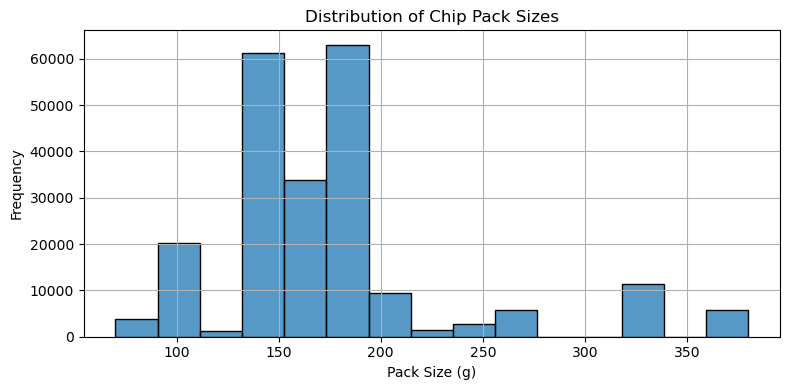

In [47]:
# Plot a histogram of pack sizes
plt.figure(figsize=(8, 4))
sns.histplot(chip_df['SIZE'], bins=15, kde=False)
plt.title('Distribution of Chip Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

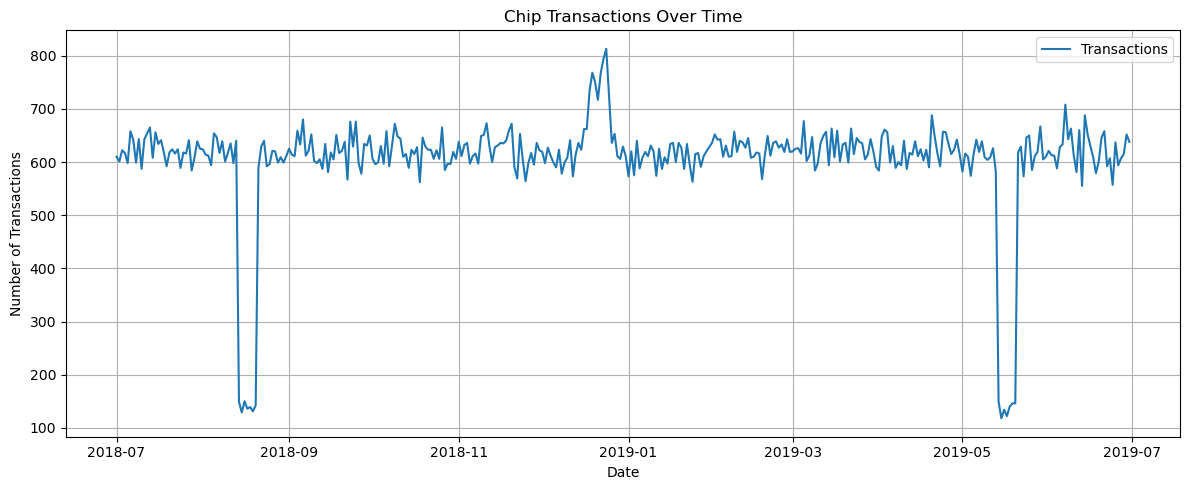

In [48]:
# Plot number of transactions over time to explore seasonality or trends
# Aggregate by date
daily_trend = chip_df.groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_trend['DATE'], daily_trend['LYLTY_CARD_NBR'], label='Transactions')
plt.title('Chip Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

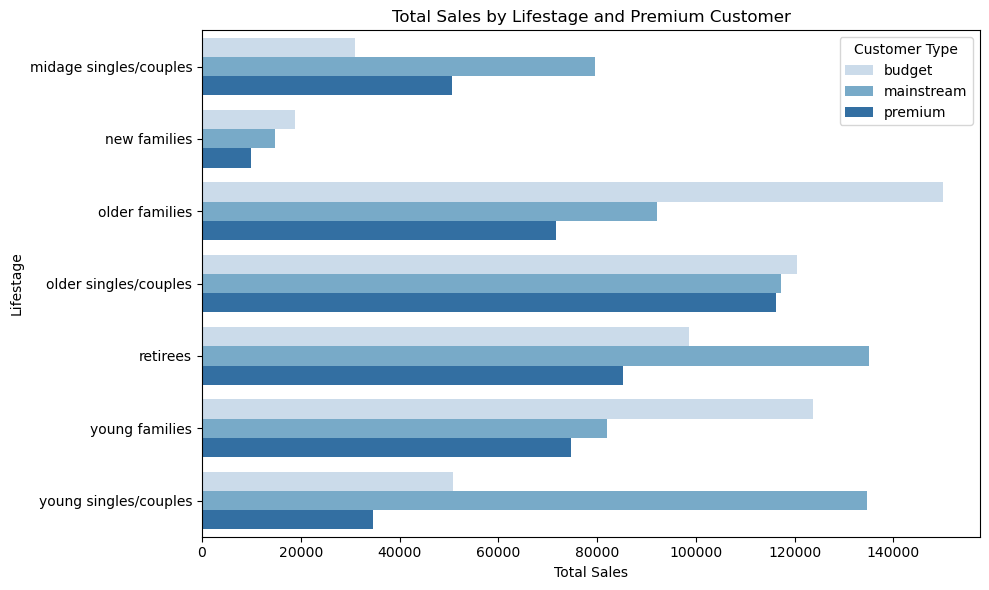

In [49]:
# Total Sales by Lifestage and Premium Customer

# Group and summarise total sales
sales_by_group = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Set the plot size
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
sns.barplot(
    data=sales_by_group,
    y='LIFESTAGE',
    x='TOT_SALES',
    hue='PREMIUM_CUSTOMER',
    palette='Blues'
)

# Set plot titles and labels
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xlabel('Total Sales')
plt.ylabel('Lifestage')
plt.legend(title='Customer Type')

# Tight layout to reduce overlap
plt.tight_layout()
plt.show()

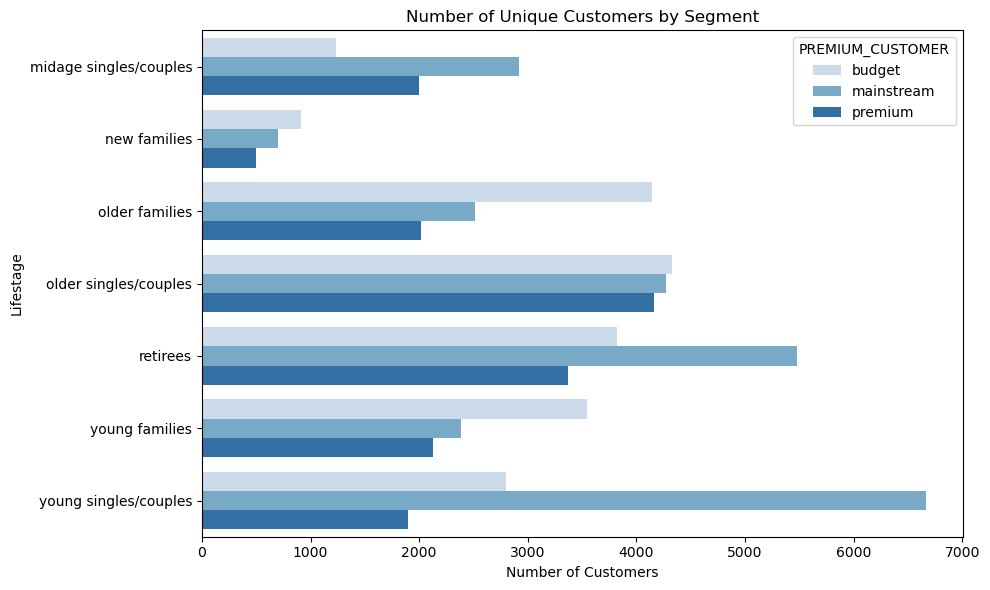

In [50]:
# Count unique customers per segment
customer_counts = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='CUSTOMER_COUNT')

# Plot customer counts
plt.figure(figsize=(10, 6))
sns.barplot(
    data=customer_counts,
    y='LIFESTAGE',
    x='CUSTOMER_COUNT',
    hue='PREMIUM_CUSTOMER',
    palette='Blues'
)
plt.title('Number of Unique Customers by Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Lifestage')
plt.tight_layout()
plt.show()

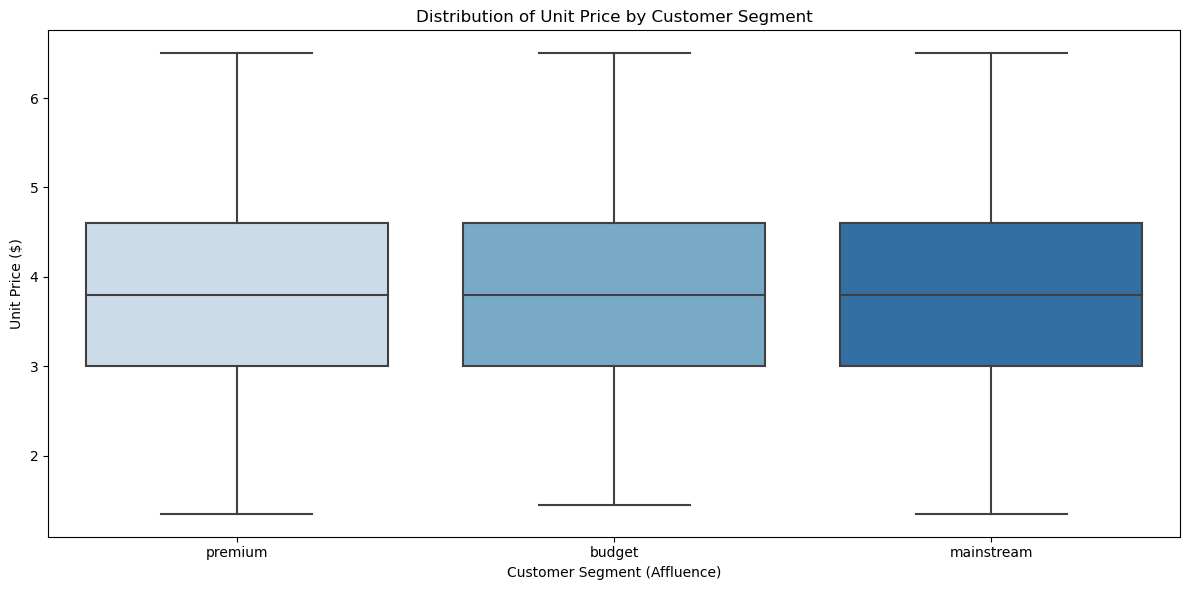

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=chip_df, x='PREMIUM_CUSTOMER', y='UNIT_PRICE', palette='Blues')
plt.title('Distribution of Unit Price by Customer Segment')
plt.xlabel('Customer Segment (Affluence)')
plt.ylabel('Unit Price ($)')
plt.tight_layout()
plt.show()

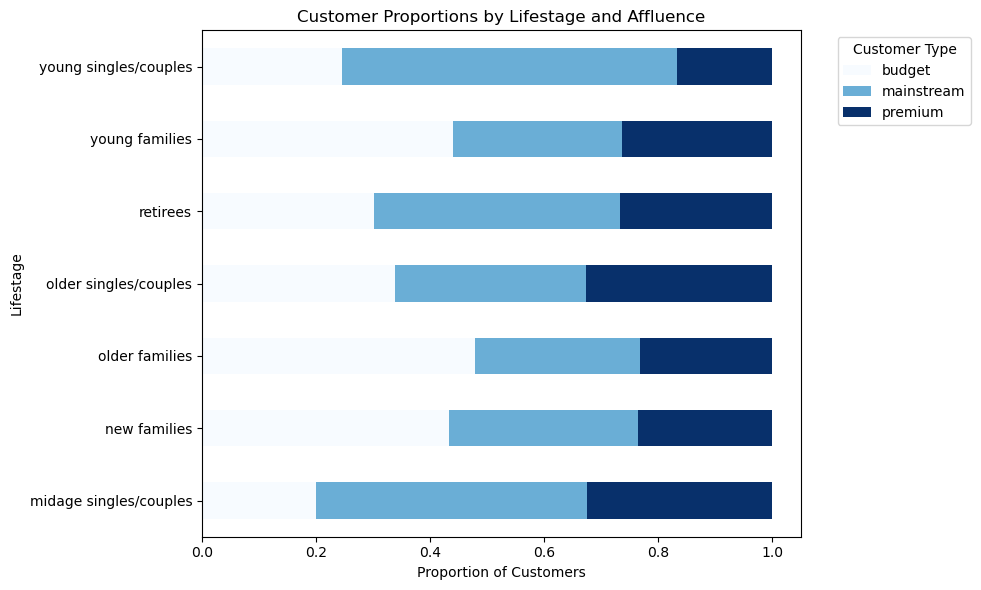

In [52]:
# Calculate customer counts
customer_counts = chip_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_pivot = customer_counts.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR')
customer_pivot = customer_pivot.div(customer_pivot.sum(axis=1), axis=0)  # convert to proportions

# Plot stacked horizontal bar
customer_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Blues')
plt.title('Customer Proportions by Lifestage and Affluence')
plt.xlabel('Proportion of Customers')
plt.ylabel('Lifestage')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Final Insights and Recommendations

### Key Insights:
- **Mainstream - Young Singles/Couples** and **Mainstream - Retirees** contribute the most to total chip sales, primarily due to a higher number of unique customers.
- These groups, along with **Midage Singles/Couples**, tend to spend more per packet, suggesting impulse buying behaviour.
- The most popular pack sizes are **175g** and **150g**, and the top brands are **Kettle**, **Doritos**, and **Smiths**.

### Recommendations:
- Focus digital promotions on **Mainstream - Young Singles/Couples**, highlighting flavour variety and impulse-friendly 175g packs.
- Promote **premium product lines** across segments to encourage upselling, especially among high-value customers.
- Maintain value bundle offers for **Older Families**, but note that their high total spend is driven by volume, not higher per-unit price sensitivity.